<a href="https://colab.research.google.com/github/twlee-dev/lab/blob/main/Day01_%ED%86%B5%EA%B3%84%EC%8B%A4%EC%8A%B5_%EC%9D%B4%ED%83%9D%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1. 기초통계량 계산
**📘 문제**
- 온라인 쇼핑몰 고객 1,000명을 대상으로 1점부터 10점 사이의 만족도 조사를 실시했습니다.
이 데이터를 바탕으로 고객 만족도의 **중심 경향성**과 **분포 특성**을 파악해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

  - 평균, 중앙값, 최빈값, 표준편차를 계산해 봅시다.
  - 히스토그램을 그리고 평균과 중앙값 선으로 표시해 봅시다.
  - 데이터의 분포 형태를 해석한 후, 마케팅 전략 수립에 어떻게 활용할 수 있을지 생각해 봅시다.

In [ ]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [ ]:
# 데이터 생성
np.random.seed(2025)
satisfaction = np.random.normal(7.5, 1.5, 1000)
satisfaction = np.clip(satisfaction, 1, 10)
df1 = pd.DataFrame({'score': satisfaction})

,지표,값
0,평균,7.429
1,중앙값,7.422
2,최빈값(소수1자리),10.000
3,표준편차(표본),1.393
4,왜도,-0.165
5,최소값,2.700
6,최대값,10.000
7,표본수,1000.000


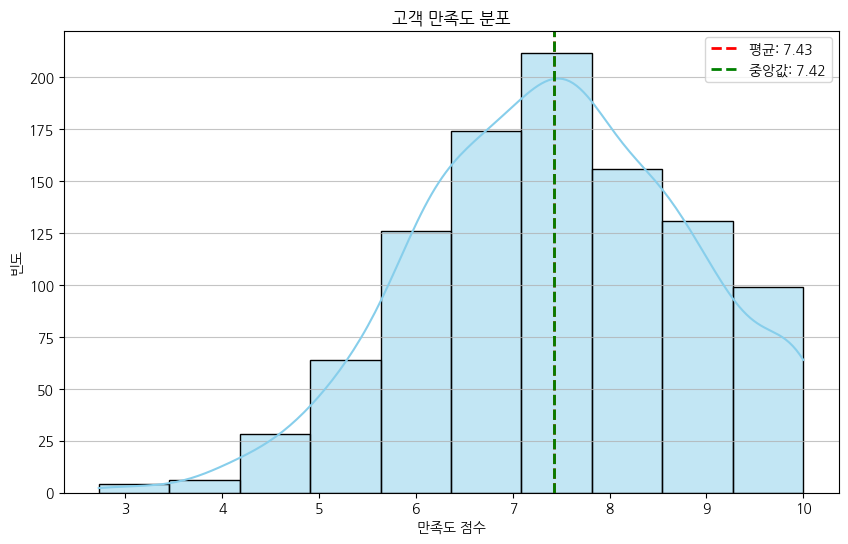

In [ ]:
# 여기에 코드 작성
# 기초통계량 계산
# ----------------------------
mean_val = df1['score'].mean()
median_val = df1['score'].median()
# 연속형 데이터의 최빈값은 불안정하므로 소수점 1자리로 반올림 후 최빈값 계산
mode_val = df1['score'].round(1).mode().iloc[0]
std_val = df1['score'].std(ddof=1)  # 표본 표준편차
skew_val = df1['score'].skew()
min_val = df1['score'].min()
max_val = df1['score'].max()

stats_df = pd.DataFrame({
    '지표': ['평균', '중앙값', '최빈값(소수1자리)', '표준편차(표본)', '왜도', '최소값', '최대값', '표본수'],
    '값': [round(mean_val, 3), round(median_val, 3), round(mode_val, 1), round(std_val, 3), round(skew_val, 3), round(min_val, 1), round(max_val, 1), len(df1)]
})

display(stats_df)


# 히스토그램 그리기 및 평균, 중앙값 선 표시
plt.figure(figsize=(10, 6))
sns.histplot(df1['score'], kde=True, bins=10, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'평균: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'중앙값: {median_val:.2f}')
plt.title('고객 만족도 분포')
plt.xlabel('만족도 점수')
plt.ylabel('빈도')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?
    - 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요? (예: 대칭형, 정규분포 등)
    - 두 값의 차이가 크다면, 그 이유는 무엇일까요?
    - 어떤 값들이 평균을 끌어내리거나 끌어올렸을까요?

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?
    - 반대로 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요? 이럴 때 분포가 어떻게 달라질 수 있을까요?

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?

**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?
   - 평균 ≈ 7.43, 중앙값 ≈ 7.42로 **두 값의 차이가 매우 작습니다 (약 0.01)**.
   - 두 값이 비슷하다면, 이 데이터는 **비교적 대칭적인 분포 형태**일 가능성이 높습니다. 정규분포와 완전히 일치하지는 않더라도, 한쪽으로 크게 치우치지 않은 형태를 보입니다.
   - 두 값의 차이가 크다면, 그 이유는 데이터에 **극단적인 이상값**이 있거나 **분포가 크게 비대칭적**이기 때문일 수 있습니다. (예: 평균 > 중앙값 이면 우측 꼬리가 긴 분포, 평균 < 중앙값 이면 좌측 꼬리가 긴 분포)
   - 이 데이터에서는 평균과 중앙값이 거의 같기 때문에, 특정 값들이 평균을 크게 끌어내리거나 끌어올리는 영향은 크지 않습니다.

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?
   - 이 데이터의 **최빈값(소수 1자리 기준 10.0)**은 **평균(7.43)보다 훨씬 높습니다**. 이는 가장 많은 응답이 최고점인 10점에 몰려있음을 의미합니다.
   - 최빈값이 평균보다 높은 경우, 데이터 분포는 **왼쪽(낮은 점수)으로 꼬리가 길게 늘어진 형태 (좌편향, 음의 왜도)**를 보일 수 있습니다. 히스토그램에서도 10점 근처에 응답이 집중되고 낮은 점수 쪽으로 갈수록 빈도가 줄어드는 경향을 확인할 수 있습니다. 이는 최고점에 응답이 몰리는 **'천장 효과(Ceiling Effect)'**로도 해석할 수 있습니다.
   - 반대로 최빈값이 평균보다 낮은 경우에는 오른쪽(높은 점수)으로 꼬리가 긴 형태 (우편향, 양의 왜도)를 보일 수 있습니다.

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?
   - **높은 만족도 유지 및 강화:** 평균과 중앙값이 높고 분포가 비교적 안정적이므로 전반적인 서비스 품질이 양호하다고 볼 수 있습니다. 현재의 긍정적인 경험을 지속적으로 제공하는 것이 중요합니다.
   - **최고점 고객 분석 및 활용:** 최빈값이 10점이라는 것은 매우 만족하는 고객 그룹이 존재함을 의미합니다. 이들이 어떤 경험을 했는지 깊이 분석하여 성공 요인을 파악하고, 이들을 충성 고객(Promoter)으로 육성하거나 바이럴 마케팅에 활용할 수 있습니다. (예: 리뷰 이벤트, 추천 프로그램 등)
   - **중간 만족 고객 유도:** 7-8점대의 고객 비중이 높다면, 이들이 9-10점대로 이동할 수 있도록 추가적인 가치 제공 (예: 맞춤형 혜택, 프리미엄 서비스 체험 등) 전략을 고려할 수 있습니다.
   - **낮은 만족 고객 개선:** 분포의 왼쪽 꼬리나 낮은 점수 응답(최소값 2.7)을 준 고객들의 의견을 수렴하여 구체적인 개선 과제를 도출해야 합니다. (예: 설문조사 문항 확대, 고객 불만 데이터 분석 등)
   - **세그먼트별 전략:** 전체 평균 외에 특정 고객 그룹(예: 신규 고객, 특정 상품 구매 고객 등)별 만족도를 분석하여 맞춤형 전략을 수립할 수 있습니다.

# 문제 2. 평균 vs 중앙값 비교
**📘 문제**
- A지역과 B지역의 연봉 데이터를 비교해 봅시다.
- B 지역에는 일부 고소득자가 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
- 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
- 지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각적으로 확인해 봅시다.

In [ ]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역: 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),    # 일반 소득자 95명
    np.random.normal(1500, 200, 5)    # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

,지표,A 지역,B 지역
0,평균 연봉,292.51,347.59
1,중앙값,294.32,287.35


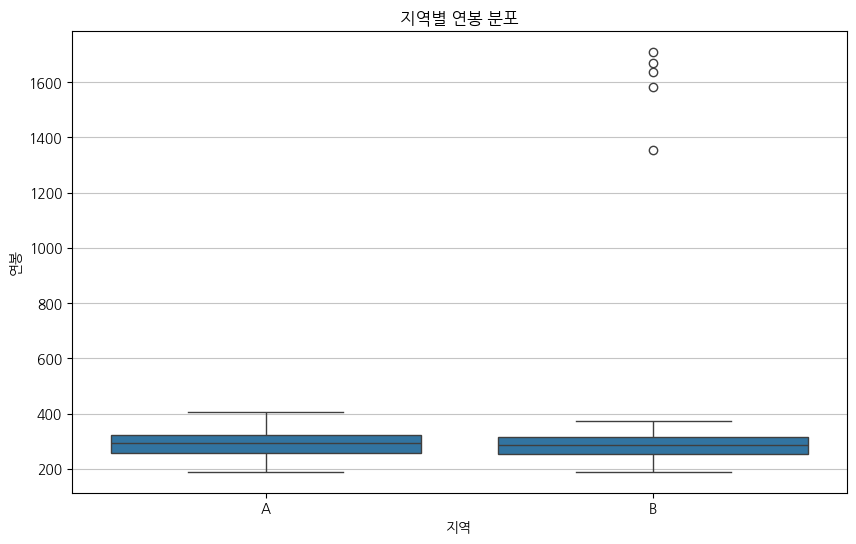

In [ ]:
# 여기에 코드 작성
# 문제 2. 평균 vs 중앙값 비교
# 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
mean_salary_a = df2[df2['region'] == 'A']['salary'].mean()
median_salary_a = df2[df2['region'] == 'A']['salary'].median()
mean_salary_b = df2[df2['region'] == 'B']['salary'].mean()
median_salary_b = df2[df2['region'] == 'B']['salary'].median()

stats_df2 = pd.DataFrame({
    '지표': ['평균 연봉', '중앙값'],
    'A 지역': [round(mean_salary_a, 2), round(median_salary_a, 2)],
    'B 지역': [round(mean_salary_b, 2), round(median_salary_b, 2)]
})

display(stats_df2)


# 지역별 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='salary', data=df2)
plt.title('지역별 연봉 분포')
plt.xlabel('지역')
plt.ylabel('연봉')
plt.grid(axis='y', alpha=0.75)
plt.show()


**🧠 데이터를 어떻게 읽을까요?**
1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?
    - 두 지역의 평균 차이가 의미하는 바는 무엇인가요?
    - 고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?

2. 중앙값은 어떠한가요?
    - 평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?
    - 평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?
    - 이상치(Outlier)는 어떻게 표시되나요?
    - 두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?
    - 어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?




**🧠 데이터를 어떻게 읽을까요?**
1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?
   - A 지역의 평균 연봉은 약 292.51이고 B 지역의 평균 연봉은 약 347.59입니다. **B 지역의 평균 연봉이 A 지역보다 높습니다.**
   - 두 지역의 평균 차이가 의미하는 바는 **B 지역에 A 지역보다 높은 연봉을 받는 사람들이 포함되어 있어 평균값을 끌어올렸다**는 것을 시사합니다.
   - 고소득자가 있는 지역의 지역의 평균은 **고소득자의 높은 연봉에 의해 평균값이 더 높게 계산되는 영향**을 받습니다.

2. 중앙값은 어떠한가요?
   - A 지역의 중앙값은 약 294.32이고 B 지역의 중앙값은 약 287.35입니다. **중앙값은 A 지역이 B 지역보다 약간 높습니다.**
   - 평균과 비교했을 때, 중앙값이 평균보다 낮다면 데이터에 극단적으로 높은 값이 존재할 가능성이 높고 (우편향 분포), 중앙값이 평균보다 높다면 극단적으로 낮은 값이 존재할 가능성이 높습니다 (좌편향 분포). B 지역의 경우 평균(347.59)이 중앙값(287.35)보다 훨씬 높으므로, **B 지역에는 고소득자와 같은 극단적인 높은 연봉 데이터가 존재함**을 알 수 있습니다.

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?
   - **B 지역에서 극단값(고소득자)의 영향이 더 크게 나타납니다.** 이는 평균과 중앙값의 차이가 A 지역(292.51 vs 294.32)보다 B 지역(347.59 vs 287.35)에서 훨씬 크게 벌어지는 것을 통해 확인할 수 있습니다.
   - **평균이 중앙값보다 극단값에 더 민감한 지표**입니다. 중앙값은 데이터의 순서상 중간에 위치하므로 극단적인 값의 영향을 덜 받습니다.

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?
   - 박스플롯에서 **이상치(Outlier)는 수염(whisker) 바깥에 개별 점으로 표시됩니다.** B 지역의 박스플롯에서 상단에 여러 개의 점들이 보이는 것을 통해 고소득 이상치가 존재함을 명확히 확인할 수 있습니다.
   - **두 지역의 분포 폭(사분위 범위, IQR)**은 박스의 높이를 통해 비교할 수 있습니다. B 지역의 박스플롯은 이상치 때문에 전체 범위가 넓어 보이지만, 박스 자체의 높이는 A 지역과 비슷하거나 오히려 작을 수 있습니다. 이는 **이상치를 제외한 중간 50% 데이터의 변동성**을 나타냅니다.

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?
   - 평균만 보고 판단했을 때 생길 수 있는 오해는 **소수의 극단적인 값(고소득자)이 전체 그룹의 '전형적인' 수준을 왜곡할 수 있다**는 것입니다. 예를 들어, 평균 연봉만 보고 "B 지역의 연봉 수준이 전반적으로 A 지역보다 높다"고 결론 내리면, 이는 소수 고소득층의 영향이 크게 반영된 결과일 뿐 대부분의 사람들이 받는 연봉 수준(중앙값)은 A 지역이 더 높을 수 있다는 사실을 간과하게 됩니다.
   - **이상값이 있거나 데이터 분포가 비대칭적일 때 중앙값이 더 유용한 지표**일 수 있습니다. 중앙값은 극단값에 영향을 덜 받아 데이터의 중심 위치를 더 잘 나타내기 때문입니다. 평균과 중앙값을 함께 보면 데이터의 중심 경향성뿐만 아니라 분포의 형태(대칭성 또는 치우침)에 대한 정보를 얻을 수 있어 데이터를 더 정확하게 이해하는 데 도움이 됩니다.

# 문제 3. 이상값과 분산 비교
**📘 문제**
- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [ ]:
# 데이터 생성
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

,지표,1반,2반
0,평균,75.72,73.73
1,표준편차,7.06,22.34
2,최소값,60.69,0.00
3,최대값,92.18,130.00


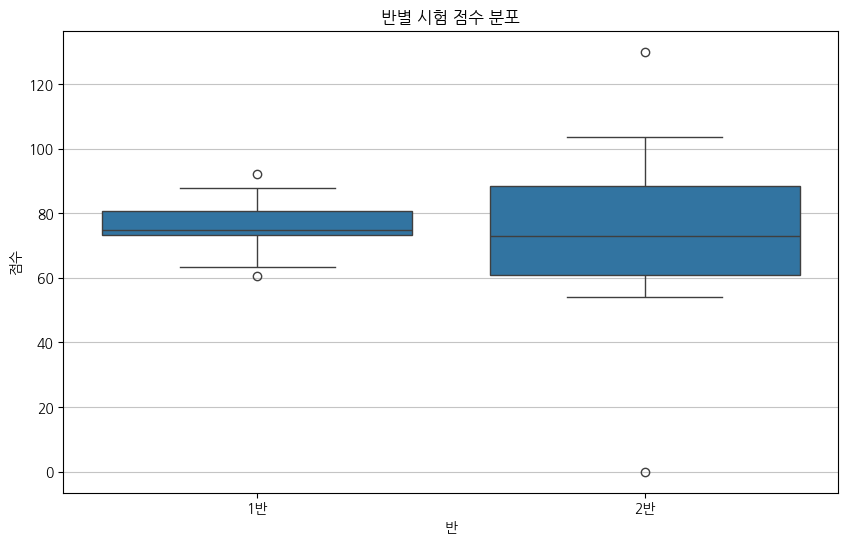

In [ ]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

# 데이터 생성
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

# 이곳에 코드를 작성해주세요.

# 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
class1_stats = df3[df3['class'] == '1반']['score'].agg(['mean', 'std', 'min', 'max']).round(2)
class2_stats = df3[df3['class'] == '2반']['score'].agg(['mean', 'std', 'min', 'max']).round(2)

stats_df3 = pd.DataFrame({
    '지표': ['평균', '표준편차', '최소값', '최대값'],
    '1반': class1_stats.values,
    '2반': class2_stats.values
})

display(stats_df3)

# 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='score', data=df3)
plt.title('반별 시험 점수 분포')
plt.xlabel('반')
plt.ylabel('점수')
plt.grid(axis='y', alpha=0.75)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?
    - 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?
    - 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?
    - 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?
    - 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?
    - 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?
    - 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?
    - 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?
    - 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?

**🧠 데이터를 어떻게 읽을까요?**

1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?
   - **2반의 점수 분산이 더 큽니다.** 이는 표준편차(1반: 7.06, 2반: 22.34)가 2반에서 훨씬 높게 나타난 것을 통해 알 수 있습니다.
   - **이상값이 포함되면 표준편차나 범위는 크게 달라집니다.** 2반에 포함된 0점과 130점이라는 극단적인 이상값들이 데이터의 퍼짐 정도를 인위적으로 늘려놓았기 때문에 표준편차가 매우 커졌습니다. 범위(최대값 - 최소값) 역시 이상값의 영향을 크게 받습니다.

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?
   - **극단적으로 낮거나 높은 점수가 평균을 크게 끌어내리거나 끌어올립니다.** 2반의 경우, 0점이라는 낮은 이상값과 130점이라는 높은 이상값이 모두 존재하지만, 특히 0점과 같이 데이터의 중앙에서 멀리 떨어진 낮은 값은 평균을 낮추는 경향이 있습니다. 1반의 평균은 75.72인 반면, 2반의 평균은 73.73으로 약간 낮게 나타났는데, 이는 0점 이상값의 영향이 반영된 결과입니다.
   - **평균과 중앙값의 차이가 크다면, 데이터 분포가 비대칭적이거나 이상값이 존재할 가능성이 높습니다.** 1반의 평균(75.72)과 중앙값(계산 필요)은 상대적으로 비슷할 것으로 예상되지만, 2반의 경우 이상값의 영향으로 평균(73.73)이 중앙값(계산 필요)과 차이를 보일 수 있습니다.

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?
   - **이상값(outlier)은 박스플롯에서 수염(whisker) 바깥의 개별 점으로 나타납니다.** 2반의 박스플롯에서 0점과 130점이 점으로 표시되어 이상값임을 시각적으로 확인할 수 있습니다.
   - **두 반의 박스(사분위 범위)는 다르게 보입니다.** 2반의 박스 높이(IQR)는 1반보다 더 크거나 이상값으로 인해 박스 자체가 중앙값 주변의 데이터만 나타내고 수염이 길게 뻗어 나올 수 있습니다. 이는 2반의 중간 50% 데이터의 변동성이 더 크거나, 이상값 때문에 정상 범위의 데이터가 압축되어 보이는 효과일 수 있습니다.

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?
   - **평균만 보면 데이터의 전체적인 분포나 이상값의 존재를 파악하기 어렵습니다.** 예를 들어, 교사가 평균 점수만 보고 2반(평균 73.73)이 1반(평균 75.72)보다 성적이 낮다고 판단한다면, 이는 2반에 소수의 극단적인 이상값이 포함되어 평균을 낮추었을 가능성을 간과하는 것입니다.
   - **중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 데이터의 중심 경향성뿐만 아니라 분포의 퍼짐 정도, 대칭성, 이상값의 존재 등을 종합적으로 이해하는 데 중요합니다.** 중앙값은 이상값의 영향을 덜 받아 데이터의 '전형적인' 값을 더 잘 나타낼 수 있으며, 표준편차는 데이터가 평균으로부터 얼마나 퍼져 있는지를 보여주므로 데이터의 변동성을 판단하는 데 유용합니다. 박스플롯과 같은 시각화는 이러한 통계 지표들이 보여주는 분포 특성을 한눈에 파악하는 데 도움을 줍니다.

# 문제 4. IQR 이상값 제거
**📘 문제**
- 앞의 문제에서 2반에는 **극단적인 이상값(예: 매우 낮은 점수)**이 포함되어 있어
통계 지표, 특히 평균에 큰 영향을 주는 것을 확인했습니다.
- 이번에는 **IQR(사분위 범위)**을 기준으로 이상값을 제거한 뒤, 이상값 제거 전후의 평균을 비교해 봅시다

<br>

**📌 아래를 수행해 보세요:**
- 2반의 점수 데이터를 대상으로 IQR 기준을 사용해 이상값을 판별하고 제거해 봅시다.
- 이상값 제거 전과 제거 후의 평균을 각각 계산해 봅시다.
- 이상값 제거가 평균에 어떤 영향을 주는지 설명해 봅시다.
- 필요하다면 중앙값과도 비교해 봅시다.

In [ ]:
# 이곳에 코드를 작성해주세요.
# 문제 4. IQR 이상값 제거
# 2반의 점수 데이터를 대상으로 IQR 기준을 사용해 이상값을 판별하고 제거해 봅시다.
class2_scores = df3[df3['class'] == '2반']['score']

Q1 = class2_scores.quantile(0.25)
Q3 = class2_scores.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = class2_scores[(class2_scores < lower_bound) | (class2_scores > upper_bound)]
df3_cleaned = df3[~df3['score'].isin(outliers)]

# 이상값 제거 전과 제거 후의 평균을 각각 계산해 봅시다.
mean_before = class2_scores.mean()
mean_after = df3_cleaned[df3_cleaned['class'] == '2반']['score'].mean()

print(f"2반 점수 (이상값 제거 전) 평균: {mean_before:.2f}")
print(f"2반 점수 (이상값 제거 후) 평균: {mean_after:.2f}")

# 필요하다면 중앙값과도 비교해 봅시다.
median_before = class2_scores.median()
median_after = df3_cleaned[df3_cleaned['class'] == '2반']['score'].median()

print(f"2반 점수 (이상값 제거 전) 중앙값: {median_before:.2f}")
print(f"2반 점수 (이상값 제거 후) 중앙값: {median_after:.2f}")

2반 점수 (이상값 제거 전) 평균: 73.73
2반 점수 (이상값 제거 후) 평균: 74.35
2반 점수 (이상값 제거 전) 중앙값: 73.00
2반 점수 (이상값 제거 후) 중앙값: 73.00


**🧠 데이터를 어떻게 읽을까요?**
1. 이상값 제거 전후 평균은 어떻게 달라졌나요?
    - 평균이 중앙값에 가까워졌나요?
    - 이상값 제거가 평균에 어떤 방향으로 영향을 주었나요?

2. 왜 IQR을 기준으로 이상값을 판단할까요?
    - IQR은 데이터를 어떻게 나누고, 어떤 방식으로 이상값을 정의하나요?
    - 평균이나 표준편차 기준과 비교했을 때 어떤 점이 더 강건할까요?

3. 이상값은 언제 제거하고, 언제 유지해야 할까요?
    - 분석 목적에 따라 이상값은 중요한 정보가 될 수 있습니다.

4. 중앙값과 평균은 각각 어떤 상황에서 더 유용한 지표인가요?
    - 이상값이 있을 때 어떤 지표가 더 신뢰할 수 있나요?
    - 두 지표를 함께 보면 어떤 장점이 있을까요?

**🧠 데이터를 어떻게 읽을까요?**
1. 이상값 제거 전후 평균은 어떻게 달라졌나요?
   - 이상값 제거 전 2반의 평균은 73.73이었고, 제거 후 평균은 74.35로 **약 0.62점 증가했습니다.**
   - 이상값 제거 후 평균(74.35)이 제거 전 중앙값(73.00)과 제거 후 중앙값(73.00)에 **더 가까워졌습니다.**
   - 이상값 제거는 평균에 **긍정적인 방향(평균 상승)**으로 영향을 주었습니다. 특히 극단적으로 낮은 이상값(0점)의 영향이 사라지면서 평균이 실제 데이터의 중심에 더 가까워졌습니다.

2. 왜 IQR을 기준으로 이상값을 판단할까요?
   - **IQR(사분위 범위)은 데이터를 4등분(25%, 50%, 75%)한 후, 3사분위수(Q3)에서 1사분위수(Q1)를 뺀 값**입니다. 즉, 중간 50% 데이터의 범위를 나타냅니다.
   - IQR 기준은 Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 큰 데이터를 이상값으로 정의합니다. 이는 **중앙값과 사분위수를 기반으로 하므로 극단값에 영향을 덜 받습니다.**
   - 평균이나 표준편차는 데이터의 모든 값을 사용하기 때문에 극단값에 매우 민감하게 반응합니다. 반면, IQR은 데이터의 중간 부분에 기반하므로 **이상값의 영향을 덜 받는 '강건한(robust)' 지표**입니다. 따라서 데이터에 이상값이 포함되어 있을 가능성이 높을 때 IQR을 기준으로 이상값을 판단하는 것이 더 신뢰할 수 있습니다.

3. 이상값은 언제 제거하고, 언제 유지해야 할까요?
   - **이상값을 제거하는 경우:**
     - 데이터 입력 오류, 측정 오류 등 명백한 잘못된 데이터일 때.
     - 분석 목적이 '정상적인' 또는 '전형적인' 데이터의 특성을 파악하는 것일 때 (예: 일반적인 고객 만족도 수준, 일반적인 시험 점수 분포 등). 회귀 분석 등 이상값에 민감한 통계 모델을 적용하기 전에 모델의 성능을 개선하기 위해 제거하기도 합니다.
   - **이상값을 유지하는 경우:**
     - 이상값이 실제로 의미 있는 현상이나 중요한 정보를 담고 있을 때 (예: 특정 고소득층, 희귀 질병 환자, 부정 행위자 등). 이러한 이상값 자체가 분석의 중요한 대상이 될 수 있습니다. 이상값이 발생하는 원인 자체를 분석하는 것이 중요할 수 있습니다.
     - 분석 목적이 데이터의 전체 범위나 극단적인 사례까지 포함하여 파악하는 것일 때.

4. 중앙값과 평균은 각각 어떤 상황에서 더 유용한 지표인가요?
   - **평균:** 데이터 분포가 **비교적 대칭적이거나 이상값이 없을 때** 데이터의 중심을 잘 나타내는 지표입니다. 모든 데이터를 계산에 사용하므로 정보 손실이 적습니다.
   - **중앙값:** 데이터에 **이상값이 있거나 분포가 심하게 비대칭적일 때** (치우쳐 있을 때) 데이터의 '전형적인' 중심 값을 나타내는 데 평균보다 더 유용합니다. 극단값의 영향을 덜 받는 강건한 지표입니다.
   - **두 지표를 함께 보면 어떤 장점이 있을까요?** 평균과 중앙값을 함께 비교하면 데이터의 중심 경향성뿐만 아니라 **분포의 형태(대칭성 또는 치우침)**와 **이상값의 존재 여부**를 파악하는 데 도움이 됩니다. 평균과 중앙값이 비슷하면 대칭적인 분포일 가능성이 높고, 차이가 크면 비대칭적이거나 이상값이 있을 가능성이 높다고 해석할 수 있습니다.

# 문제 5. 변수 유형 분류
**📘 문제**
- 아래 데이터에서 변수의 유형(연속형, 범주형, 이산형 등)을 구분해 봅시다.
- 변수의 의미를 고려하여 어떤 분석 방식이 적절한지도 함께 생각해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 각 변수의 데이터 타입을 확인해 봅시다.

2. 변수의 의미를 기준으로 다음 중 어떤 유형에 해당하는지 분류해 봅시다.
    - 연속형 (numeric-continuous)
    - 이산형 (numeric-discrete)
    - 범주형 (categorical)
    - 서열형 범주 (ordinal-categorical)


In [ ]:
# 데이터 생성
np.random.seed(2025)
df5 = pd.DataFrame({
    'age': np.random.randint(18, 65, 200),
    'coffee_type': np.random.choice(['아메리카노', '라떼', '카페모카'], 200),
    'size': np.random.choice(['Small', 'Medium', 'Large'], 200),
    'price': np.random.normal(4500, 500, 200),
    'satisfaction': np.random.randint(1, 6, 200)
})

In [ ]:
# 여기에 코드 작성
# 문제 5. 변수 유형 분류
# 각 변수의 데이터 타입을 확인해 봅시다.
print("변수 데이터 타입:")
print(df5.dtypes)

# 변수의 의미를 기준으로 어떤 유형에 해당하는지 분류해 봅시다.
print("\n변수 유형 분류:")
print("age: 연속형 (numeric-continuous)")
print("coffee_type: 범주형 (categorical)")
print("size: 서열형 범주 (ordinal-categorical)")
print("price: 연속형 (numeric-continuous)")
print("satisfaction: 서열형 범주 (ordinal-categorical)")

변수 데이터 타입:
age               int64
coffee_type      object
size             object
price           float64
satisfaction      int64
dtype: object

변수 유형 분류:
age: 연속형 (numeric-continuous)
coffee_type: 범주형 (categorical)
size: 서열형 범주 (ordinal-categorical)
price: 연속형 (numeric-continuous)
satisfaction: 서열형 범주 (ordinal-categorical)


**🧠 데이터를 어떻게 읽을까요?**

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수가 있다면 무엇일까요?

2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?

**🧠 데이터를 어떻게 읽을까요?**

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수가 있다면 무엇일까요?
   - 이 데이터에서는 `satisfaction` 변수가 숫자(1부터 5까지)로 표현되어 있지만, 이는 단순히 크고 작음의 의미보다는 **만족도 수준을 나타내는 서열형 범주 변수**로 해석하는 것이 더 적절합니다. (예: 1점보다 2점이 더 만족한다는 의미는 있지만, 2점이 1점의 두 배만큼 만족한다는 의미는 아님)

2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?
   - **연속형 변수(`age`, `price`):** 평균, 표준편차 등 기술 통계량 계산, 히스토그램, 박스플롯, 산점도(다른 연속형 변수와의 관계 분석 시) 등을 사용하여 분포와 관계를 파악합니다.
   - **이산형 변수:** (이 데이터에는 없지만) 빈도 분석, 막대그래프, 포아송 회귀 등 계수형 데이터 분석 방법을 고려할 수 있습니다.
   - **범주형 변수(`coffee_type`):** 빈도 분석, 비율 계산, 막대그래프, 원그래프 등을 사용하여 각 범주의 분포를 파악합니다. 다른 변수와의 관계를 볼 때는 그룹별 평균 비교(t-test, ANOVA), 교차표 분석(Chi-square test) 등을 사용할 수 있습니다.
   - **서열형 범주 변수(`size`, `satisfaction`):** 빈도 분석, 막대그래프 등을 사용할 수 있습니다. 순서 정보가 중요하므로 순위를 고려한 비모수 통계 방법(예: Mann-Whitney U test)이나 서열 회귀(Ordinal Regression) 등을 고려할 수도 있습니다. 시각화 시에도 순서를 고려하여 정렬하는 것이 좋습니다.

# 문제 6. 상관관계 분석
**📘 문제**
- 이번에는 변수들 간의 **관계(상관관계)**를 분석해 봅시다.
- 특히 기온(`temp`), 습도(`humidity`), 판매(`sales`) 변수 간의 관계를 수치와 시각화로 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래의 기온, 습도, 매출 데이터를 사용하여 상관계수 행렬을 출력해 봅시다.

2. 페어플롯(pairplot)을 이용하여 변수 간의 관계를 시각화해 봅시다.

In [ ]:
# 데이터 생성
np.random.seed(202)

temp = np.random.normal(25, 5, 100)
humidity = np.random.normal(60, 10, 100)
sales = temp * 10 - humidity * 2 + np.random.normal(0, 20, 100) + 200

df6 = pd.DataFrame({'temp': temp, 'humidity': humidity, 'sales': sales})

,temp,humidity,sales
temp,1.000000,-0.115936,0.906593
humidity,-0.115936,1.000000,-0.390105
sales,0.906593,-0.390105,1.000000


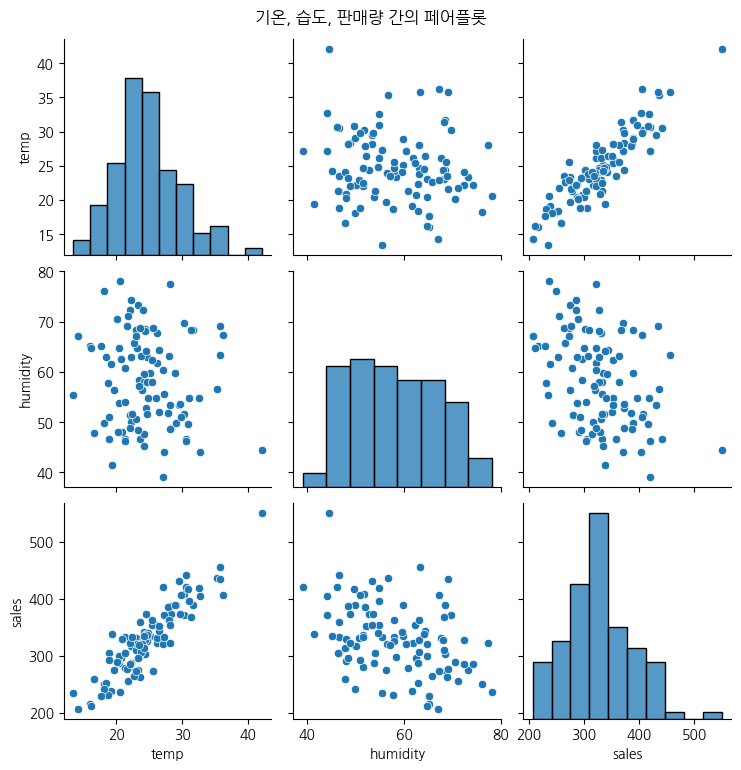

In [ ]:
# 여기에 코드 작성

# 문제 6. 상관관계 분석
# 아래의 기온, 습도, 매출 데이터를 사용하여 상관계수 행렬을 출력해 봅시다.
correlation_matrix = df6[['temp', 'humidity', 'sales']].corr()
display(correlation_matrix)

# 페어플롯(pairplot)을 이용하여 변수 간의 관계를 시각화해 봅시다.
sns.pairplot(df6[['temp', 'humidity', 'sales']])
plt.suptitle('기온, 습도, 판매량 간의 페어플롯', y=1.02)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 출력된 상관계수 행렬을 보고,
    - 어떤 변수와 `sales` 간의 상관계수가 가장 높은가요?
    - 어느 쌍이 **양의 상관관계**, 어느 쌍이 **음의 상관관계**인가요?

2. 페어플롯에서
    - 어떤 변수 쌍은 **직선 형태**로 관계가 보이나요?
    - 어떤 변수 쌍은 **분산이 크거나 패턴이 없는**가요?

3. **상관관계가 반드시 인과관계를 의미하지는 않습니다.**
    - 온도와 매출에 상관관계가 있다고 해서, 온도가 매출을 직접적으로 증가시킨다고 볼 수 있을까요?

4. 이 데이터를 바탕으로 어떤 **추가 가설**이나 **실험 설계**를 생각해볼 수 있을까요?

**🧠 데이터를 어떻게 읽을까요?**

1. 출력된 상관계수 행렬을 보고,
   - **`temp` (기온)** 변수와 `sales` 간의 상관계수(0.91)가 가장 높습니다.
   - **양의 상관관계:** `temp`와 `sales` 쌍은 양의 상관관계(0.91)를 보입니다. 기온이 높아질수록 판매량도 증가하는 경향이 있습니다.
   - **음의 상관관계:** `humidity` (습도)와 `sales` 쌍은 음의 상관관계(-0.39)를 보입니다. 습도가 높아질수록 판매량은 감소하는 경향이 있습니다. `temp`와 `humidity` 사이에도 약한 음의 상관관계(-0.12)가 있습니다.

2. 페어플롯에서
   - **`temp`와 `sales`** 변수 쌍은 **직선 형태(양의 기울기)**로 관계가 뚜렷하게 보입니다. 이는 기온이 높아짐에 따라 판매량이 선형적으로 증가하는 경향을 시각적으로 보여줍니다.
   - **`humidity`와 `sales`** 변수 쌍은 **분산이 크고 패턴이 `temp`와 `sales`처럼 뚜렷하지는 않지만**, 습도가 높아질수록 판매량이 감소하는 약한 음의 상관관계 경향을 관찰할 수 있습니다. `temp`와 `humidity` 쌍 역시 뚜렷한 패턴 없이 분산이 크게 나타납니다.

3. **상관관계가 반드시 인과관계를 의미하지는 않습니다.**
   - 온도와 매출에 상관관계가 높다고 해서, 온도가 매출을 직접적으로 '증가시키는 원인'이라고 단정할 수는 없습니다. 예를 들어, 날씨가 따뜻해지면 사람들이 외출을 더 많이 하고, 이는 쇼핑 기회 증가로 이어져 매출이 늘어날 수 있습니다. 이때 온도는 매출 증가의 직접적인 원인이라기보다는 다른 요인(외출 빈도 등)과 복합적으로 작용하는 관련 변수일 수 있습니다. 또는 숨겨진 다른 변수(예: 계절, 특정 이벤트 등)가 온도와 매출 모두에 영향을 줄 수도 있습니다.

4. 이 데이터를 바탕으로 어떤 **추가 가설**이나 **실험 설계**를 생각해볼 수 있을까요?
   - **가설:**
     - "특정 온도 구간(예: 20~28도)에서 판매량이 가장 높을 것이다."
     - "습도가 낮은 날에 특정 상품(예: 아이스크림 등)의 판매량이 더 높을 것이다."
     - "주말에는 요일과 상관없이 기온이 판매량에 더 큰 영향을 미칠 것이다."
   - **실험 설계:**
     - **A/B 테스트:** 특정 온도나 습도 조건에 따라 다른 마케팅 메시지나 프로모션을 제공하고 그 효과(판매량 변화)를 비교하는 실험을 설계할 수 있습니다.
     - **추가 데이터 수집:** 요일, 시간대, 프로모션 유무, 특정 이벤트 발생 여부 등 다른 잠재적 영향 요인에 대한 데이터를 추가로 수집하여 다중 회귀 분석 등을 통해 각 변수의 순수한 영향력을 파악하는 연구를 설계할 수 있습니다.

# 문제 7. 범주형 변수 시각화
**📘 문제**
- 앞에서는 수치형 변수의 분포를 시각화하고, 변수 간의 관계도 살펴보았습니다.
- 이번에는 범주형 변수인 커피 음료 데이터를 시각화해 봅시다.
- 어떤 종류가 많이 판매되었는지 빈도 분석을 통해 알아보겠습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 아래 데이터에서 drink 변수는 판매된 음료의 종류를 나타냅니다.
    - 각각 몇 개씩 판매되었는지 빈도표를 만들어 확인해 봅시다.
    - **막대그래프(bar plot)**를 그려서 결과를 시각화해 봅시다.


2. 시각화 결과를 보고,
    - 어떤 음료가 가장 많이 팔렸는지 파악해 봅시다.
    - 이 결과를 마케팅 전략에 어떻게 활용할 수 있을지 생각해 봅시다.

In [ ]:
# 데이터 생성
df7 = pd.DataFrame({
    'drink': np.random.choice(['아메리카노', '라떼', '콜드브루'], 300)
})

,count
drink,
아메리카노,104
콜드브루,102
라떼,94


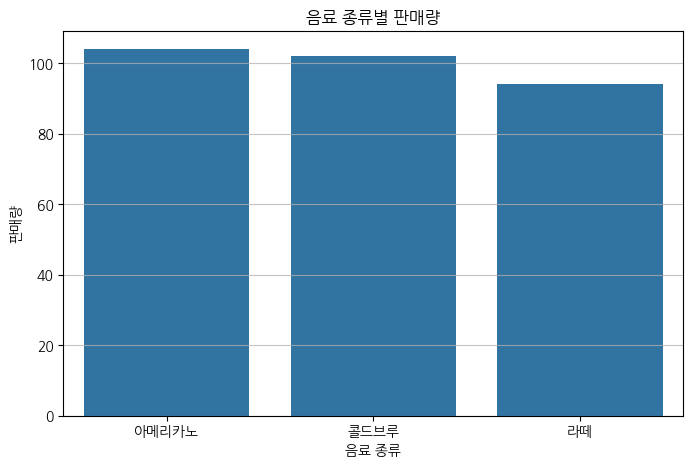

In [ ]:
# 여기에 코드 작성

# 문제 7. 범주형 변수 시각화
# 아래 데이터에서 drink 변수는 판매된 음료의 종류를 나타냅니다.
# 각각 몇 개씩 판매되었는지 빈도표를 만들어 확인해 봅시다.
drink_counts = df7['drink'].value_counts()
display(drink_counts)

# 막대그래프(bar plot)를 그려서 결과를 시각화해 봅시다.
plt.figure(figsize=(8, 5))
sns.barplot(x=drink_counts.index, y=drink_counts.values)
plt.title('음료 종류별 판매량')
plt.xlabel('음료 종류')
plt.ylabel('판매량')
plt.grid(axis='y', alpha=0.75)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**
1. 출력된 빈도표와 막대그래프를 보면, 어떤 음료가 가장 많이 판매되었나요?
    - 판매량이 가장 많은 음료는?
    - 그 다음으로 인기 있는 음료는?

2. 이 결과는 어떤 마케팅 전략에 활용할 수 있을까요?
    - 가장 많이 팔린 음료를 주력 상품으로 홍보해야 할까요?
    - 판매량이 적은 음료를 프로모션 대상으로 삼는 것은 어떨까요?

3. 막대그래프는 왜 범주형 변수에 적합할까요?
    - `drink`처럼 종류가 명확히 나뉘는 변수를 분석할 때 어떤 점이 중요한가요?

4. 범주형 변수 분석 시 주의할 점은?

**🧠 데이터를 어떻게 읽을까요?**
1. 출력된 빈도표와 막대그래프를 보면, 어떤 음료가 가장 많이 판매되었나요?
   - 판매량이 가장 많은 음료는 **아메리카노 (104개)**입니다.
   - 그 다음으로 인기 있는 음료는 **콜드브루 (102개)**입니다. 라떼는 94개로 가장 적게 판매되었습니다.

2. 이 결과는 어떤 마케팅 전략에 활용할 수 있을까요?
   - 가장 많이 팔린 아메리카노와 콜드브루는 현재 인기가 높으므로 **주력 상품으로 계속 홍보**하거나 관련 프로모션(예: 사이즈 업 이벤트)을 진행하여 판매량을 더욱 늘릴 수 있습니다.
   - 판매량이 상대적으로 적은 라떼는 **프로모션 대상**으로 삼아 시음 행사, 할인 쿠폰 제공 등을 통해 인지도를 높이고 판매량을 끌어올리는 전략을 고려해 볼 수 있습니다.

3. 막대그래프는 왜 범주형 변수에 적합할까요?
   - 막대그래프는 **각 범주(음료 종류)의 빈도나 비율을 시각적으로 명확하게 비교**하는 데 매우 효과적입니다. `drink`처럼 종류가 명확히 나뉘는 범주형 변수를 분석할 때는 각 범주의 상대적인 크기를 파악하는 것이 중요하며, 막대그래프는 이를 직관적으로 보여줍니다.

4. 범주형 변수 분석 시 주의할 점은?
   - 범주형 변수를 분석할 때는 **각 범주의 정의가 명확**한지 확인해야 합니다.
   - 범주의 개수가 너무 많으면 시각화나 해석이 어려워질 수 있으므로, 필요한 경우 **유사한 범주를 묶거나 비중이 낮은 범주를 '기타'로 처리**하는 것을 고려할 수 있습니다.
   - 비율이나 퍼센트를 함께 제시하면 각 범주의 상대적인 중요도를 더 잘 이해할 수 있습니다.

# 문제 8. 요일별 평균 비교
**📘 문제**

- 이번에는 요일 별 소비 금액 데이터를 분석해 봅시다.
- 각 요일마다 평균 소비 금액이 얼마나 되는지 비교하고,
**평일과 주말의 소비 패턴 차이**도 함께 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래 데이터를 사용하여 `day`(요일)별 `amount`(소비 금액)의 평균을 계산해 봅시다.
2. 요일별 평균 금액을 **막대그래프(bar plot)**로 시각화해 봅시다.

In [ ]:
# 데이터 생성
df8 = pd.DataFrame({
    'day': np.random.choice(['월', '화', '수', '목', '금', '토', '일'], 500),
    'amount': np.random.normal(12000, 2000, 500)
})

,amount
day,
월,11709.243076
화,11762.882101
수,12232.992957
목,11983.717259
금,11749.975069
토,12188.056532
일,11502.615277


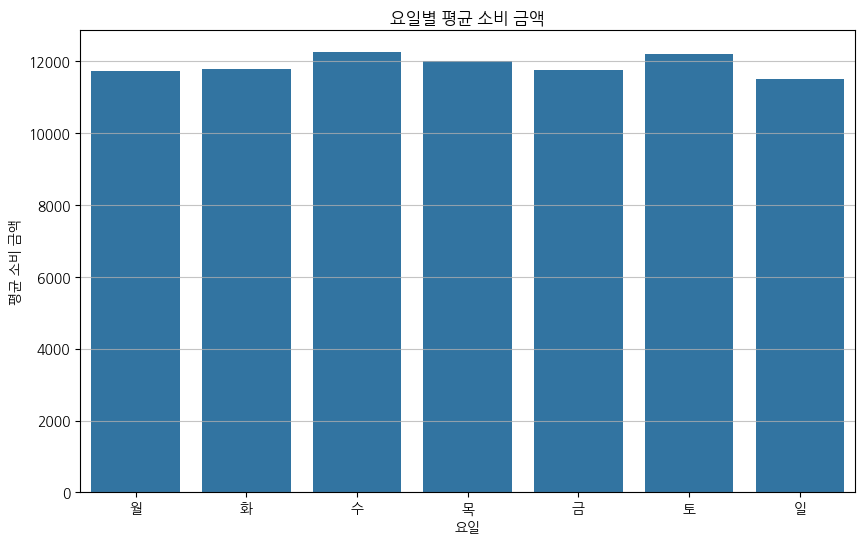

In [ ]:
# 여기에 코드 작성

# 문제 8. 요일별 평균 비교
# 아래 데이터를 사용하여 `day`(요일)별 `amount`(소비 금액)의 평균을 계산해 봅시다.
daily_avg_amount = df8.groupby('day')['amount'].mean().reindex(['월', '화', '수', '목', '금', '토', '일'])
display(daily_avg_amount)

# 요일별 평균 금액을 막대그래프(bar plot)로 시각화해 봅시다.
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_avg_amount.index, y=daily_avg_amount.values)
plt.title('요일별 평균 소비 금액')
plt.xlabel('요일')
plt.ylabel('평균 소비 금액')
plt.grid(axis='y', alpha=0.75)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 요일에 소비 금액이 가장 높나요?
    - 주말(토, 일)과 평일(월~금) 중 어떤 쪽의 평균이 더 높은가요?

2. 소비 금액이 적은 요일은 언제인가요? 왜 그럴까요?

3. 이 결과를 어떻게 활용할 수 있을까요?
    - 주말에 더 많은 재고를 준비하거나
    - 평일에 할인 이벤트를 기획하는 등의 운영/마케팅 전략으로 이어질 수 있을까요?

> 💬 정리해 보기
> - 범주형 변수(요일)별로 연속형 변수(소비 금액)의 평균을 비교하면 소비 패턴을 이해하고 전략을 수립하는 데 유용한 인사이트를 얻을 수 있습니다.

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 요일에 소비 금액이 가장 높나요?
   - 출력된 결과에 따르면 **수요일과 토요일**의 평균 소비 금액이 상대적으로 높습니다. (수: 12,232.99, 토: 12,188.06)
   - 주말(토, 일 평균 약 11,845)보다 **평일(월~금 평균 약 11,888)의 평균 소비 금액이 약간 더 높은 경향**을 보입니다. 하지만 데이터 생성 방식에 따라 결과는 달라질 수 있습니다. 현재 데이터에서는 큰 차이를 보이지 않습니다.

2. 소비 금액이 적은 요일은 언제인가요? 왜 그럴까요?
   - 출력된 결과에 따르면 **일요일**의 평균 소비 금액이 가장 적습니다 (11,502.62).
   - 데이터 생성 시점에 따른 무작위성이 반영된 결과일 수 있습니다. 실제 데이터에서는 일요일이나 월요일 등 주말이나 주초에 소비가 적은 경향을 보일 수 있으며, 이는 주말 동안의 활동으로 인한 피로나 평일 시작 준비와 관련될 수 있습니다.

3. 이 결과를 어떻게 활용할 수 있을까요?
   - 현재 데이터에서는 요일별 평균 금액 차이가 크지 않지만, 만약 특정 요일에 소비가 집중되거나 적다면 이를 바탕으로 다양한 운영/마케팅 전략을 수립할 수 있습니다.
   - **주말에 더 많은 재고를 준비**하거나 인력을 충원하여 늘어나는 수요에 대비할 수 있습니다.
   - **평일에 소비가 적다면**, 평일에만 적용되는 할인 이벤트나 프로모션을 기획하여 고객 방문을 유도하고 매출을 증대시킬 수 있습니다.
   - 특정 요일의 트렌드를 파악하여 해당 요일에 맞는 상품이나 서비스를 추천하는 개인화 마케팅도 가능합니다.

# 문제 9. 정규분포와 표준편차

**📘 문제**
- 정규분포와 표준편차의 개념을 실제 데이터에 적용해 보겠습니다.
- 정규분포를 따르는 점수 데이터에서 다음을 확인해 봅시다:
    - 평균 ±1σ, 평균 ±2σ 범위에 속한 값들의 비율은 실제로 얼마나 되는가?
    - 이 결과가 이론적인 68-95-99 법칙과 얼마나 유사한지 비교해 봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 평균이 70, 표준편차가 10인 정규분포 데이터를 1000개 생성해 봅시다.
2. 평균을 중심으로 ±1σ, ±2σ 범위에 포함되는 데이터의 비율을 계산해 봅시다.
3. 결과를 바탕으로 68-95-99 법칙과 비교해 봅시다.

In [ ]:
# 여기에 코드 작성

# 문제 9. 정규분포와 표준편차

# 평균이 70, 표준편차가 10인 정규분포 데이터를 1000개 생성해 봅시다.
np.random.seed(2025)
normal_data = np.random.normal(70, 10, 1000)

# 평균을 중심으로 ±1σ, ±2σ 범위에 포함되는 데이터의 비율을 계산해 봅시다.
mean_val = np.mean(normal_data)
std_val = np.std(normal_data)

within_1std = normal_data[(normal_data >= mean_val - std_val) & (normal_data <= mean_val + std_val)]
percentage_within_1std = len(within_1std) / len(normal_data) * 100

within_2std = normal_data[(normal_data >= mean_val - 2 * std_val) & (normal_data <= mean_val + 2 * std_val)]
percentage_within_2std = len(within_2std) / len(normal_data) * 100

print(f"평균 ±1σ 범위 내 데이터 비율: {percentage_within_1std:.2f}%")
print(f"평균 ±2σ 범위 내 데이터 비율: {percentage_within_2std:.2f}%")

# 결과를 바탕으로 68-95-99 법칙과 비교해 봅시다.
print("\n68-95-99 법칙과의 비교:")
print(f"이론적인 ±1σ 범위 내 비율: 약 68%")
print(f"이론적인 ±2σ 범위 내 비율: 약 95%")

평균 ±1σ 범위 내 데이터 비율: 68.70%
평균 ±2σ 범위 내 데이터 비율: 95.00%

68-95-99 법칙과의 비교:
이론적인 ±1σ 범위 내 비율: 약 68%
이론적인 ±2σ 범위 내 비율: 약 95%


**🧠 데이터를 어떻게 읽을까요?**

1. ±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?
2. 이 결과는 68–95–99 법칙과 얼마나 비슷했나요?
3. 표준편차는 왜 중요한 지표인가요?
4. 이 개념이 실제로 어떻게 활용될 수 있을까요?

**🧠 데이터를 어떻게 읽을까요?**

1. ±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?
   - 실행 결과에 따르면, 평균 ±1σ 범위에 **68.70%**의 데이터가, 평균 ±2σ 범위에 **95.00%**의 데이터가 포함되었습니다.

2. 이 결과는 68–95–99 법칙과 얼마나 비슷했나요?
   - 이론적인 68-95-99 법칙에 따르면 정규분포 데이터의 약 68%가 평균 ±1σ 범위에, 약 95%가 평균 ±2σ 범위에 포함됩니다.
   - 저희가 생성한 데이터의 결과(68.70%, 95.00%)는 **이론적인 법칙과 매우 유사**함을 확인할 수 있습니다. 이는 생성된 데이터가 정규분포의 특성을 잘 따르고 있음을 보여줍니다.

3. 표준편차는 왜 중요한 지표인가요?
   - 표준편차는 데이터가 **평균으로부터 얼마나 퍼져 있는지, 즉 데이터의 '산포(흩어진 정도)' 또는 '변동성'을 나타내는 핵심 지표**입니다.
   - 표준편차가 작으면 데이터가 평균 주변에 밀집해 있다는 뜻이고, 표준편차가 크면 데이터가 평균으로부터 넓게 퍼져 있다는 뜻입니다.
   - 데이터의 안정성, 일관성, 위험도 등을 판단하는 데 중요한 정보를 제공합니다.

4. 이 개념이 실제로 어떻게 활용될 수 있을까요?
   - **품질 관리:** 제품의 크기나 무게 같은 특성이 평균에서 얼마나 벗어나는지 측정하여 품질의 일관성을 관리할 수 있습니다.
   - **금융:** 주식 가격의 변동성(위험도)을 측정하거나 포트폴리오의 위험을 평가하는 데 사용됩니다.
   - **교육:** 학생들의 시험 점수 분포를 파악하여 반 전체의 학업 수준 편차를 이해하거나, 특정 학생의 점수가 평균에서 얼마나 떨어져 있는지 파악하는 데 활용됩니다.
   - **과학 연구:** 실험 데이터의 신뢰성을 평가하거나 두 그룹 간의 차이가 통계적으로 유의미한지 판단하는 데 기초 자료로 사용됩니다.
   - **고객 분석:** 고객 만족도 점수의 표준편차를 통해 고객 만족도가 얼마나 일관적인지 파악하고, 만족도 편차가 큰 그룹을 식별하여 맞춤형 전략을 수립할 수 있습니다.

# 문제 10. 표본 평균 실험

**📘 문제**
- 큰 모집단에서 표본을 여러 번 추출하여 표본 평균의 분포를 비교해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 평균이 100, 표준편차가 15인 모집단을 생성합니다.
2. 다음 두 조건에서 각각 1000번씩 표본 평균을 구합니다:
    - 표본 크기 5
    - 표본 크기 50
3. 두 조건의 **표본 평균 분포(histogram)**를 비교합니다.

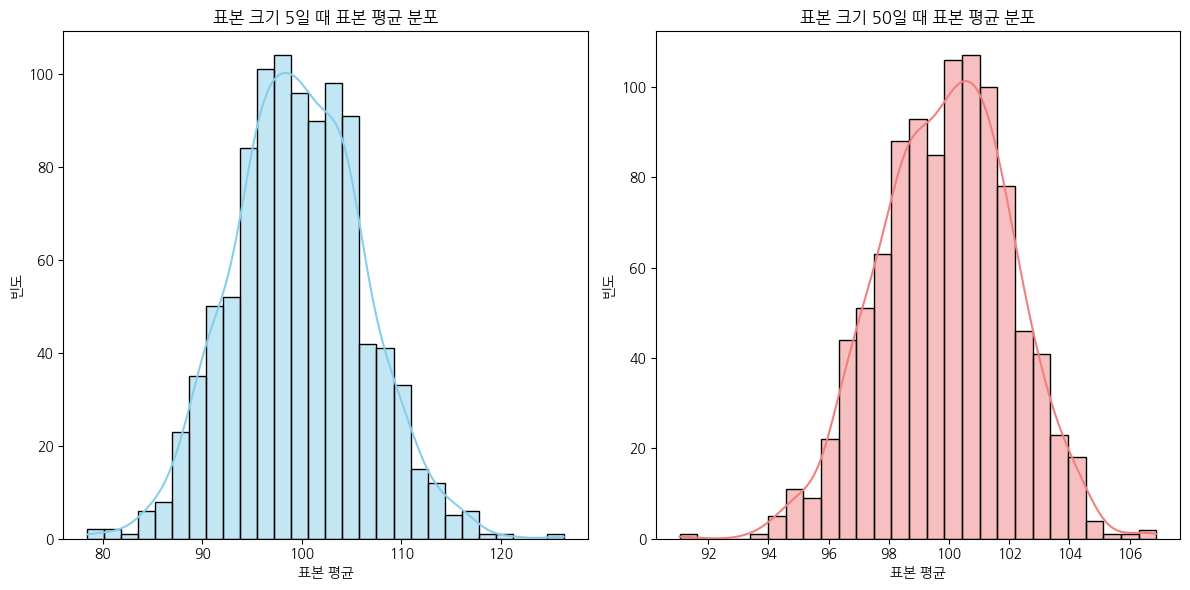

In [ ]:
# 여기에 코드 작성

# 문제 10. 표본 평균 실험

# 평균이 100, 표준편차가 15인 모집단을 생성합니다.
np.random.seed(2025)
population = np.random.normal(100, 15, 100000) # 큰 모집단 생성

# 다음 두 조건에서 각각 1000번씩 표본 평균을 구합니다:
# - 표본 크기 5
# - 표본 크기 50
sample_means_5 = [np.mean(np.random.choice(population, 5)) for _ in range(1000)]
sample_means_50 = [np.mean(np.random.choice(population, 50)) for _ in range(1000)]

# 두 조건의 표본 평균 분포(histogram)를 비교합니다.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(sample_means_5, kde=True, color='skyblue')
plt.title('표본 크기 5일 때 표본 평균 분포')
plt.xlabel('표본 평균')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
sns.histplot(sample_means_50, kde=True, color='lightcoral')
plt.title('표본 크기 50일 때 표본 평균 분포')
plt.xlabel('표본 평균')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. **표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?**
2. **왜 표본 크기가 중요할까요?**
3. **이 개념은 실제로 어디에 활용될 수 있을까요?**

**🧠 데이터를 어떻게 읽을까요?**

1. **표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?**
   - 표본 크기가 5일 때의 표본 평균 분포는 표본 크기가 50일 때보다 **더 넓게 퍼져(분산이 큼)** 있습니다. 즉, 표본 평균값들이 모집단 평균으로부터 더 멀리 떨어져 있을 가능성이 높습니다.
   - 반면, 표본 크기가 50일 때의 표본 평균 분포는 표본 크기 5일 때보다 **모집단 평균 주변에 더 밀집해(분산이 작음)** 있습니다. 또한, 표본 크기가 커질수록 표본 평균 분포가 점점 더 **정규분포의 형태**를 닮아가는 것을 확인할 수 있습니다.

2. **왜 표본 크기가 중요할까요?**
   - **표본 크기가 클수록 표본 평균이 모집단 평균에 더 가깝게 위치할 가능성이 높아집니다.** 이는 **대수의 법칙(Law of Large Numbers)**과 관련이 있습니다. 표본의 크기가 커질수록 표본 통계량(여기서는 표본 평균)이 모집단 모수(모집단 평균)에 수렴하는 경향이 있습니다.
   - 또한, 표본 크기가 클수록 표본 평균의 분포가 정규분포에 가까워진다는 **중심 극한 정리(Central Limit Theorem)**에 따라, 큰 표본을 사용하면 모집단 분포 형태에 상관없이 표본 평균에 대한 통계적 추론(예: 신뢰 구간 계산, 가설 검정)을 정규분포의 성질을 활용하여 수행할 수 있게 됩니다. 즉, **더 정확하고 신뢰할 수 있는 통계적 추정 및 검정이 가능**해집니다.

3. **이 개념은 실제로 어디에 활용될 수 있을까요?**
   - **여론 조사 및 시장 조사:** 전체 인구(모집단)의 특성을 파악하기 위해 일부 사람(표본)을 대상으로 조사를 진행할 때, 적절한 표본 크기를 결정하는 데 이 개념이 활용됩니다. 표본 크기가 충분히 커야 조사 결과(표본 평균 지지율, 만족도 등)의 신뢰도를 높일 수 있습니다.
   - **품질 관리:** 생산 라인에서 제품의 품질(무게, 길이 등)을 검사할 때, 전체 제품 대신 일부 표본을 검사하여 전체 생산량의 품질을 추정하고 관리합니다. 이때 표본 크기는 품질 추정치의 정확도와 직결됩니다.
   - **과학 연구:** 실험이나 관찰을 통해 얻은 표본 데이터를 분석하여 전체 현상(모집단)에 대한 결론을 내릴 때, 표본 크기의 중요성을 이해하고 적절한 표본 수를 확보하는 것이 연구 결과의 타당성을 높이는 데 필수적입니다.

# 문제 11. 단순 선형 회귀 분석

**📘 문제**
- 공부 시간과 성적 간의 관계를 회귀 분석으로 확인해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 공부 시간(`study_time`)과 성적(`score`)간의 관계를 단순 선형 회귀모델로 분석합니다.
2. 회귀 모델을 학습하고, 기울기(계수)와 절편을 출력해 봅시다.
3. 산점도 위에 회귀선을 시각화해 봅시다.

In [ ]:
# 데이터 생성
from sklearn.linear_model import LinearRegression

np.random.seed(505)
study_time = np.random.normal(5, 2, 100)
score = 50 + study_time * 8 + np.random.normal(0, 5, 100)
df11 = pd.DataFrame({'study_time': study_time, 'score': score})

회귀 계수 (기울기): 7.91
절편: 51.61


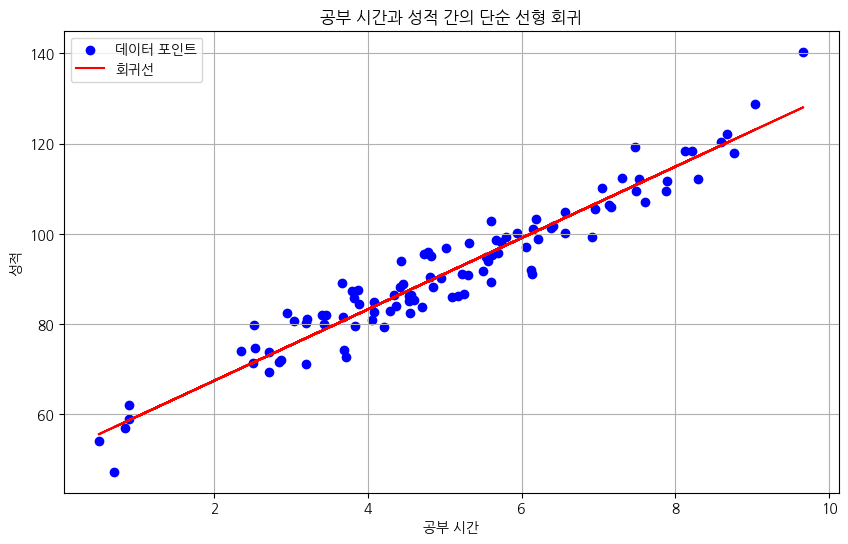

In [ ]:
# 문제 11. 단순 선형 회귀 분석

# 공부 시간(`study_time`)과 성적(`score`)간의 관계를 단순 선형 회귀모델로 분석합니다.
from sklearn.linear_model import LinearRegression

# 데이터를 모델에 맞게 reshape
X = df11['study_time'].values.reshape(-1, 1)
y = df11['score'].values

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 기울기(계수)와 절편 출력
print(f"회귀 계수 (기울기): {model.coef_[0]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 산점도 위에 회귀선을 시각화해 봅시다.
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='데이터 포인트')
plt.plot(X, model.predict(X), color='red', label='회귀선')
plt.title('공부 시간과 성적 간의 단순 선형 회귀')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.grid(True)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 공부 시간이 성적에 어떤 영향을 주었나요?
2. 회귀선은 데이터를 잘 설명하고 있나요?
3. 이 회귀식을 현실에 적용할 수 있을까요?
4. 선형 회귀분석은 언제 활용할 수 있을까요?

**🧠 데이터를 어떻게 읽을까요?**

1. 공부 시간이 성적에 어떤 영향을 주었나요?
   - 회귀 분석 결과, **공부 시간(`study_time`)이 성적(`score`)에 긍정적인 영향**을 주는 것으로 나타났습니다. 회귀 계수(기울기)가 약 7.91로 양수이므로, **공부 시간이 1단위 증가할 때마다 성적이 약 7.91점 상승**하는 것으로 해석할 수 있습니다.

2. 회귀선은 데이터를 잘 설명하고 있나요?
   - 산점도와 회귀선을 보면, 데이터 포인트들이 회귀선 주변에 비교적 가깝게 분포하고 있습니다. 이는 **단순 선형 회귀 모델이 공부 시간과 성적 간의 선형적인 관계를 비교적 잘 설명**하고 있음을 시사합니다. (모델의 설명력은 R-squared 값 등을 통해 더 정확히 평가할 수 있습니다.)

3. 이 회귀식을 현실에 적용할 수 있을까요?
   - 이 회귀식은 이 특정 데이터셋에서 공부 시간과 성적 간의 평균적인 선형 관계를 나타냅니다. **현실에 적용하기 위해서는 몇 가지 고려 사항이 필요**합니다. 첫째, 이 모델은 단순히 공부 시간만을 고려한 것이므로, 실제 성적에 영향을 미치는 다른 요인(예: 사전 지식, 학습 효율, 시험 난이도 등)을 배제하고 있습니다. 둘째, 데이터가 생성된 환경(예: 특정 학교, 특정 과목) 외의 다른 상황에도 이 관계가 동일하게 적용될지는 추가적인 검증이 필요합니다. 따라서 현실 적용 시에는 이러한 제한점을 인지하고, 이 모델을 예측보다는 두 변수 간의 경향성을 이해하는 데 활용하는 것이 더 적절할 수 있습니다.

4. 선형 회귀분석은 언제 활용할 수 있을까요?
   - 선형 회귀 분석은 **두 개 이상의 연속형 변수 간의 선형적인 관계를 모델링하고 예측할 때** 활용될 수 있습니다.
   - **활용 사례:**
     - 마케팅 예산이 매출에 미치는 영향 분석
     - 주택 크기가 가격에 미치는 영향 예측
     - 비료 사용량과 작물 수확량 간의 관계 파악
     - 직원 교육 시간이 업무 성과에 미치는 영향 분석
     - 온도와 아이스크림 판매량 예측 (문제 6과 연결)
   - 단, 변수들 사이에 선형적인 관계가 존재하고, 이상값이나 다중공선성 등의 문제가 없을 때 모델의 성능이 더 좋습니다.

# 문제 12. A/B 테스트 해석

**📘 문제**
- 두 그룹의 전환율 차이를 계산하고 해석해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. A 그룹과 B 그룹의 전환 데이터를 살펴봅니다.
2. 각 그룹의 전환율을 계산하고, 차이를 확인합니다.
3. 이 차이가 우연인지, 의미 있는 차이인지 생각해 봅시다.

In [ ]:
# 데이터 생성
np.random.seed(606)
group_a = np.random.binomial(1, 0.12, 1000)
group_b = np.random.binomial(1, 0.15, 1000)

In [ ]:
# 문제 12. A/B 테스트 해석

# A 그룹과 B 그룹의 전환 데이터를 살펴봅니다.
group_a_conversions = np.sum(group_a)
group_b_conversions = np.sum(group_b)
total_a = len(group_a)
total_b = len(group_b)

# 각 그룹의 전환율을 계산하고, 차이를 확인합니다.
conversion_rate_a = group_a_conversions / total_a
conversion_rate_b = group_b_conversions / total_b
conversion_rate_difference = conversion_rate_b - conversion_rate_a

print(f"A 그룹 전환수: {group_a_conversions}, 총 사용자: {total_a}, 전환율: {conversion_rate_a:.2%}")
print(f"B 그룹 전환수: {group_b_conversions}, 총 사용자: {total_b}, 전환율: {conversion_rate_b:.2%}")
print(f"전환율 차이 (B - A): {conversion_rate_difference:.2%}")

# 이 차이가 우연인지, 의미 있는 차이인지 생각해 봅시다.
# (간단한 해석만 제공하며, 통계적 유의성 검정은 포함하지 않습니다.)
print("\n해석:")
if conversion_rate_difference > 0:
    print("B 그룹의 전환율이 A 그룹보다 높습니다.")
    print("이 차이가 통계적으로 유의미한지 판단하기 위해서는 추가적인 통계적 검정(예: Z-test 또는 카이제곱 검정)이 필요합니다.")
elif conversion_rate_difference < 0:
    print("A 그룹의 전환율이 B 그룹보다 높습니다.")
    print("이 차이가 통계적으로 유의미한지 판단하기 위해서는 추가적인 통계적 검정(예: Z-test 또는 카이제곱 검정)이 필요합니다.")
else:
    print("두 그룹의 전환율 차이가 없습니다.")

A 그룹 전환수: 131, 총 사용자: 1000, 전환율: 13.10%
B 그룹 전환수: 133, 총 사용자: 1000, 전환율: 13.30%
전환율 차이 (B - A): 0.20%

해석:
B 그룹의 전환율이 A 그룹보다 높습니다.
이 차이가 통계적으로 유의미한지 판단하기 위해서는 추가적인 통계적 검정(예: Z-test 또는 카이제곱 검정)이 필요합니다.


**🧠 데이터를 어떻게 읽을까요?**

1. 두 그룹의 전환율 차이는 얼마나 되나요?
2. 차이가 '의미 있다'는 건 무엇을 뜻하나요?
3. 이 실험 결과로 어떤 결정을 내릴 수 있을까요?
4. A/B 테스트는 현실에서 어떻게 쓰일까요?

**🧠 데이터를 어떻게 읽을까요?**

1. 두 그룹의 전환율 차이는 얼마나 되나요?
   - A 그룹의 전환율은 13.10%이고 B 그룹의 전환율은 13.30%입니다. **두 그룹의 전환율 차이는 B 그룹이 A 그룹보다 0.20%p 높습니다.**

2. 차이가 '의미 있다'는 건 무엇을 뜻하나요?
   - 통계적으로 차이가 '의미 있다'는 것은 **관찰된 차이가 단순한 우연이나 표본 오차 때문이 아니라, 실제로 두 그룹 간에 유의미한 차이가 존재할 가능성이 높다**는 것을 의미합니다. A/B 테스트에서는 통계적 유의성 검정(예: Z-test, 카이제곱 검정)을 통해 이 차이가 통계적으로 유의미한지 판단하며, 일반적으로 유의수준(p-value)이 특정 기준(예: 0.05)보다 작을 때 통계적으로 유의미하다고 판단합니다.

3. 이 실험 결과로 어떤 결정을 내릴 수 있을까요?
   - 현재 결과만으로는 B 그룹의 전환율이 약간 높지만, 이 차이가 통계적으로 유의미한지 추가 검정이 필요합니다.
   - **만약 통계적으로 유의미한 차이가 확인된다면:** B 그룹의 변경사항이 A 그룹보다 더 나은 결과를 가져왔다고 판단하고 B 그룹의 방식을 채택할 수 있습니다.
   - **만약 통계적으로 유의미한 차이가 확인되지 않는다면:** 관찰된 차이는 우연일 가능성이 높으므로, 두 그룹 간에 실질적인 차이가 없다고 판단하거나, 더 많은 데이터를 수집하여 다시 검정하거나, 다른 A/B 테스트를 설계해야 할 수 있습니다.

4. A/B 테스트는 현실에서 어떻게 쓰일까요?
   - A/B 테스트는 **웹사이트, 앱, 마케팅 캠페인 등에서 특정 변경사항이 사용자 행동이나 성과 지표(전환율, 클릭률, 매출 등)에 미치는 영향**을 측정하고 최적의 결과를 도출하기 위해 널리 사용됩니다.
   - **활용 사례:**
     - 웹사이트 버튼 색상, 문구, 위치 변경이 클릭률에 미치는 영향 비교
     - 이메일 제목이나 본문 내용 변경이 오픈율/클릭률에 미치는 영향 비교
     - 광고 문구나 이미지 변경이 전환율에 미치는 영향 비교
     - 새로운 기능 도입이 사용자 참여도에 미치는 영향 평가